In [1]:
# DATA PREPROCESSING STAGE 

In [591]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main_df = pd.read_csv("student.csv")

In [592]:
main_df.shape


(395, 18)

In [593]:
main_df.isna().sum()

school         0
sex            0
age           15
address        0
Medu           0
Fedu           0
studytime      0
failures       0
activities     0
nursery        0
higher         0
freetime       0
goout          0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

In [594]:
main_df["age"].value_counts() ##here according to data there are two students with outlier values. (21, 22). 
## So that can deviate the mean by some amount. So we can consider median over mean for this feature to fill the na 
## values

16.0    97
17.0    97
15.0    79
18.0    79
19.0    23
20.0     3
21.0     1
22.0     1
Name: age, dtype: int64

In [595]:
age_mean = main_df['age'].mean()
age_median = main_df['age'].median()

print("mean : ", age_mean)
print("median : ", age_median)

## mean value is less here than median. So there is very little deviation of mean due to outliers. So we use mean to fill the data.

mean :  16.705263157894738
median :  17.0


In [596]:
main_df["age"].fillna(age_mean, inplace = True) ##now we have removed all the na values.

In [597]:
main_df.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
failures      0
activities    0
nursery       0
higher        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [598]:
cat_columns = main_df.select_dtypes(exclude=["number","bool_"])
print("Categorial Data : ", cat_columns.columns)


Categorial Data :  Index(['school', 'sex', 'address', 'activities', 'nursery', 'higher'], dtype='object')


In [599]:
print(main_df["school"].unique())
print(main_df["sex"].unique())
print(main_df["address"].unique())
print(main_df["activities"].unique())
print(main_df["nursery"].unique())
print(main_df["higher"].unique())

['GP' 'MS']
['F' 'M']
['U' 'R']
['no' 'yes']
['yes' 'no']
['yes' 'no']


In [600]:
print(main_df["school"].value_counts())
print(main_df["sex"].value_counts())
print(main_df["address"].value_counts())
print(main_df["activities"].value_counts())
print(main_df["nursery"].value_counts())
print(main_df["higher"].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    307
R     88
Name: address, dtype: int64
yes    201
no     194
Name: activities, dtype: int64
yes    314
no      81
Name: nursery, dtype: int64
yes    375
no      20
Name: higher, dtype: int64


In [601]:
school_encode = pd.get_dummies(main_df.school)
sex_encode = pd.get_dummies(main_df.sex)
address_encode = pd.get_dummies(main_df.address)
activities_encode = pd.get_dummies(main_df.activities)
nursery_encode = pd.get_dummies(main_df.nursery)
higher_encode = pd.get_dummies(main_df.higher)

In [602]:
merged_df = pd.concat([main_df, school_encode, sex_encode, address_encode, activities_encode, nursery_encode, higher_encode], axis = 'columns')

In [603]:
print(merged_df.head(100))

   school sex        age address  Medu  Fedu  studytime  failures activities  \
0      GP   F  18.000000       U     4     4          2         0         no   
1      GP   F  17.000000       U     1     1          2         0         no   
2      GP   F  15.000000       U     1     1          2         3         no   
3      GP   F  15.000000       U     4     2          3         0        yes   
4      GP   F  16.000000       U     3     3          2         0         no   
..    ...  ..        ...     ...   ...   ...        ...       ...        ...   
95     GP   F  15.000000       R     1     1          4         1        yes   
96     GP   M  16.000000       R     4     3          1         0        yes   
97     GP   F  16.000000       U     2     1          2         0         no   
98     GP   F  16.705263       U     4     4          1         0        yes   
99     GP   F  16.000000       U     4     3          3         0         no   

   nursery  ...  F  M  R  U  no  yes  n

In [604]:
merged_df.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'studytime',
       'failures', 'activities', 'nursery', 'higher', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3', 'GP', 'MS', 'F', 'M', 'R', 'U',
       'no', 'yes', 'no', 'yes', 'no', 'yes'],
      dtype='object')

In [605]:
merged_df.drop(['school', 'sex', 'address', 'nursery', 'higher', 'activities', 'F', 'R', 'no', 'no', 'no', 'GP'], axis = 'columns', inplace = True)

In [606]:
cat_columns = merged_df.select_dtypes(exclude=["number","bool_"])
print("Categorial Data : ", cat_columns.columns)

Categorial Data :  Index([], dtype='object')


In [607]:
merged_df.index[merged_df.duplicated()]    #no duplicate rows

Int64Index([], dtype='int64')

In [608]:
main_df = merged_df
X = main_df.drop("G3", axis = "columns")
y = main_df["G3"]
X.count()

age          395
Medu         395
Fedu         395
studytime    395
failures     395
freetime     395
goout        395
health       395
absences     395
G1           395
G2           395
MS           395
M            395
U            395
yes          395
yes          395
yes          395
dtype: int64

<AxesSubplot:>

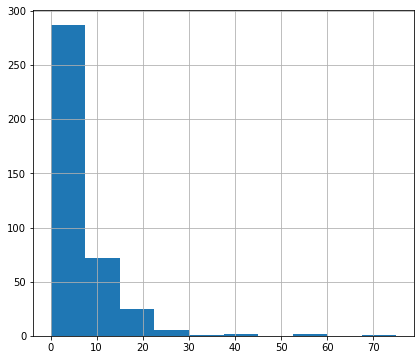

In [609]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
merged_df['absences'].hist()

In [610]:
merged_df['log_absences'] = np.log(merged_df['absences'] + 1)
merged_df.drop("absences", 1)

,age,Medu,Fedu,studytime,failures,freetime,goout,health,G1,G2,G3,MS,M,U,yes,yes,yes,log_absences
0,18.0,4,4,2,0,3,4,3,5,6,6,0,0,1,0,1,1,1.945910
1,17.0,1,1,2,0,3,3,3,5,5,6,0,0,1,0,0,1,1.609438
2,15.0,1,1,2,3,3,2,3,7,8,10,0,0,1,0,1,1,2.397895
3,15.0,4,2,3,0,2,2,5,15,14,15,0,0,1,1,1,1,1.098612
4,16.0,3,3,2,0,3,2,5,6,10,10,0,0,1,0,1,1,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2,2,2,2,5,4,4,9,9,9,1,1,1,0,1,1,2.484907
391,17.0,3,1,1,0,4,5,2,14,16,16,1,1,1,0,0,1,1.386294
392,21.0,1,1,1,3,5,3,3,10,8,7,1,1,0,0,0,1,1.386294
393,18.0,3,2,1,0,4,1,5,11,12,10,1,1,0,0,0,1,0.000000


<AxesSubplot:>

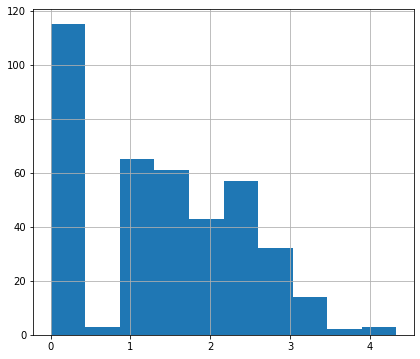

In [611]:
plt.figure(figsize=(15, 6))   ##After applying log function
plt.subplot(1,2,1)
merged_df['log_absences'].hist()

In [612]:
                                    # using sklearn

In [613]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [614]:
# from sklearn.linear_model import LinearRegression
# clf = LinearRegression()
# clf.fit(X_train, y_train)

In [615]:
# clf.predict(X_test)

In [616]:
# clf.score(X_test, y_test)

In [617]:
                                    #  a.univariate Regression

In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main_df = pd.read_csv('student.csv')
main_df.head()

,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10


In [619]:
corr_matrix = main_df.corr()   #we are checking the correlation matrix to find the relationship between variables. Here G2 has the highest correlation among others so we will pick G2 for now as our independent variable to predict G3
print(corr_matrix)


                age      Medu      Fedu  studytime  failures  freetime  \
age        1.000000 -0.157654 -0.170833  -0.001696  0.239690  0.027574   
Medu      -0.157654  1.000000  0.623455   0.064944 -0.236680  0.030891   
Fedu      -0.170833  0.623455  1.000000  -0.009175 -0.250408 -0.012846   
studytime -0.001696  0.064944 -0.009175   1.000000 -0.173563 -0.143198   
failures   0.239690 -0.236680 -0.250408  -0.173563  1.000000  0.091987   
freetime   0.027574  0.030891 -0.012846  -0.143198  0.091987  1.000000   
goout      0.117736  0.064094  0.043105  -0.063904  0.124561  0.285019   
health    -0.085577 -0.046878  0.014742  -0.075616  0.065827  0.075733   
absences   0.175388  0.100285  0.024473  -0.062700  0.063726 -0.058078   
G1        -0.043231  0.205341  0.190270   0.160612 -0.354718  0.012613   
G2        -0.125728  0.215527  0.164893   0.135880 -0.355896 -0.013777   
G3        -0.148143  0.217147  0.152457   0.097820 -0.360415  0.011307   

              goout    health  absenc

<AxesSubplot:title={'center':'G2 grade VS G3 grade'}, xlabel='G3'>

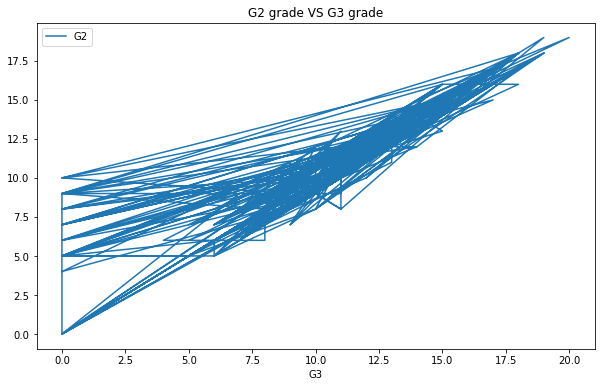

In [620]:
main_df.plot(x='G3', y='G2', kind = 'line', title = 'G2 grade VS G3 grade')

Text(0.5, 1.0, 'Scatter plot of data')

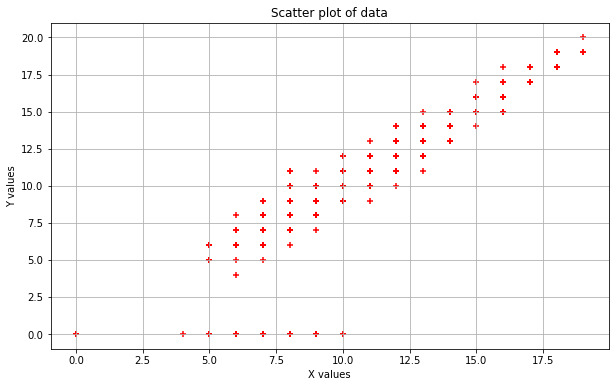

In [621]:
X_u = main_df['G2'].values
y_u = main_df['G3'].values
m = X_u.shape[0]

plt.scatter(X_u,y_u, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter plot of data')

In [622]:

main_df = main_df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(main_df))
# Split your dataset 
X_train_u = X_u[:train_size]
X_test_u = X_u[train_size:]

y_train_u = y[:train_size]
y_test_u = y[train_size:]

#Lets create a matrix with single column of ones


m = X_train_u.shape[0]
n = X_test_u.shape[0]
X_u0 = np.ones((m, 1))
X_u0[:5]
X_train_u = X_train_u.reshape((m, 1))
X_test_u = X_test_u.reshape((n, 1))
print(X_train_u.shape)
print(X_test_u.shape)
print(y_train_u.shape)
print(y_test_u.shape)

(276, 1)
(119, 1)
(276,)
(119,)


In [623]:
X_train_u = np.hstack((X_train_u, X_u0))

In [624]:
X_train_u

array([[ 6.,  1.],
       [ 5.,  1.],
       [ 8.,  1.],
       [14.,  1.],
       [10.,  1.],
       [15.,  1.],
       [12.,  1.],
       [ 5.,  1.],
       [18.,  1.],
       [15.,  1.],
       [ 8.,  1.],
       [12.,  1.],
       [14.,  1.],
       [10.,  1.],
       [16.,  1.],
       [14.,  1.],
       [14.,  1.],
       [10.,  1.],
       [ 5.,  1.],
       [10.,  1.],
       [14.,  1.],
       [15.,  1.],
       [15.,  1.],
       [13.,  1.],
       [ 9.,  1.],
       [ 9.,  1.],
       [12.,  1.],
       [16.,  1.],
       [11.,  1.],
       [12.,  1.],
       [11.,  1.],
       [16.,  1.],
       [16.,  1.],
       [10.,  1.],
       [14.,  1.],
       [ 7.,  1.],
       [16.,  1.],
       [16.,  1.],
       [12.,  1.],
       [13.,  1.],
       [10.,  1.],
       [12.,  1.],
       [18.,  1.],
       [ 8.,  1.],
       [10.,  1.],
       [ 8.,  1.],
       [12.,  1.],
       [19.,  1.],
       [15.,  1.],
       [ 7.,  1.],
       [13.,  1.],
       [13.,  1.],
       [11.,

In [625]:
theta_u = np.zeros(2)
theta_u.shape

(2,)

In [626]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    #y = y.values.reshape(X.shape[0], 1)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

In [627]:
X_train_u.shape
cost_u = compute_cost(X_train_u, y_train_u, theta_u)
print('The cost for given values of theta_0 and theta_1 =', cost_u)

The cost for given values of theta_0 and theta_1 = 64.78985507246377


In [628]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history.append(compute_cost(X, y, theta)) 
    return theta, cost_history

In [629]:
theta = [5., 5.]
iterations = 1500;
alpha = 0.01;

In [630]:
theta_train_u, cost_history = gradient_descent(X_train_u, y_train_u, theta_u, alpha, iterations)
print('Final value of theta =', theta_train_u)


Final value of theta = [ 1.05449825 -0.72907416]


Text(0.5, 1.0, 'Convergence of gradient descent Univariate')

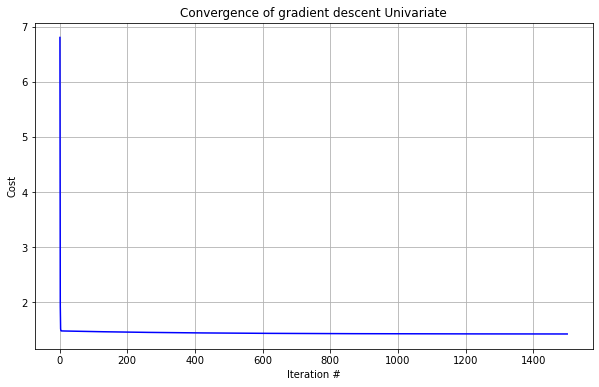

In [631]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Iteration #")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent Univariate")

In [632]:
X_u0 = np.ones((n, 1))
X_test_u = np.hstack((X_test_u, X_u0))


In [633]:
cost_test_u = compute_cost(X_test_u, y_test_u, theta_train_u)
print('The cost for given values of theta_0 and theta_1 =', cost_test_u)





The cost for given values of theta_0 and theta_1 = 1.33056271583254


In [634]:
def mean_squared_error(predictions, targets):
    differences = predictions - targets                       
    differences_squared = differences ** 2                    
    mean_of_differences_squared = differences_squared.mean()  
    rmse_val = np.sqrt(mean_of_differences_squared)           
    return rmse_val 

In [635]:
from math import sqrt
y_predicted_u = X_test_u.dot(theta_train_u)
rms_n = (mean_squared_error(y_test_u, y_predicted_u))
print(rms_n)

import matplotlib.pyplot as plt
print(y_predicted_u.shape)
# plt.scatter(X_test_u , y_predicted_u)
# plt.show()

2.484355451535901
(119,)


In [636]:
from sklearn.metrics import r2_score   
r2_score(y_test_u, y_predicted_u)

0.7081053879784662

In [637]:
                            #multi-variate with G1, G2 to predict G3

In [638]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main_df = pd.read_csv("student.csv")

num_columns = len(main_df.columns)
X_col = main_df[['G1','G2']]    #Taking G1, G2 because they have high correlation value with G3
y_col = main_df[["G3"]]
print(X_col.columns)
print(y_col.columns)



Index(['G1', 'G2'], dtype='object')
Index(['G3'], dtype='object')


In [639]:
main_df = main_df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(main_df))
# Split your dataset
X_m = X_col
y_m = y_col
X_train_m = X_m[:train_size]
X_test_m = X_m[train_size:]

y_train_m = y[:train_size]
y_test_m = y[train_size:]

#Lets create a matrix with single column of ones


m = X_train_m.shape[0]
n = X_test_m.shape[0]
X_u0 = np.ones((m, 1))
X_u0[:5]
# X_train_m = X_train_m.reshape((m, 1))
# X_test_m = X_test_m.reshape((n, 1))
print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)

(276, 2)
(119, 2)
(276,)
(119,)


In [640]:
print(X_train_m.values)

[[ 5  6]
 [ 5  5]
 [ 7  8]
 [15 14]
 [ 6 10]
 [15 15]
 [12 12]
 [ 6  5]
 [16 18]
 [14 15]
 [10  8]
 [10 12]
 [14 14]
 [10 10]
 [14 16]
 [14 14]
 [13 14]
 [ 8 10]
 [ 6  5]
 [ 8 10]
 [13 14]
 [12 15]
 [15 15]
 [13 13]
 [10  9]
 [ 6  9]
 [12 12]
 [15 16]
 [11 11]
 [10 12]
 [ 9 11]
 [17 16]
 [17 16]
 [ 8 10]
 [12 14]
 [ 8  7]
 [15 16]
 [15 16]
 [12 12]
 [14 13]
 [ 7 10]
 [12 12]
 [19 18]
 [ 8  8]
 [10 10]
 [ 8  8]
 [11 12]
 [19 19]
 [15 15]
 [ 7  7]
 [12 13]
 [11 13]
 [11 11]
 [ 8 10]
 [10 13]
 [ 8  9]
 [14 15]
 [14 15]
 [ 9 10]
 [15 16]
 [10 11]
 [10  8]
 [ 8 10]
 [10  9]
 [10 10]
 [16 15]
 [13 13]
 [ 7  7]
 [ 8  9]
 [16 16]
 [13 15]
 [10 10]
 [ 8  6]
 [12 12]
 [11 12]
 [ 9  9]
 [11 11]
 [11 11]
 [ 8  8]
 [ 5  5]
 [10 12]
 [11 10]
 [ 7  6]
 [15 15]
 [ 9 10]
 [ 7  9]
 [ 8  7]
 [13 14]
 [11 10]
 [ 8  6]
 [ 7  7]
 [16 17]
 [ 7  6]
 [11 10]
 [11 13]
 [ 7 10]
 [11 15]
 [ 8  9]
 [11 14]
 [ 7  9]
 [ 7  7]
 [16 17]
 [10 13]
 [ 7  6]
 [16 18]
 [10 11]
 [ 7  8]
 [16 18]
 [10 13]
 [14 15]
 [18 19]
 

In [641]:
X_0 = np.ones((m, 1))
X_train_m = np.hstack((X_train_m, X_0))
print(X_train_m)
              
theta_m = np.zeros(3)
print("theta: ", theta_m.shape)
print("X: ", X_train_m.shape)



[[ 5.  6.  1.]
 [ 5.  5.  1.]
 [ 7.  8.  1.]
 [15. 14.  1.]
 [ 6. 10.  1.]
 [15. 15.  1.]
 [12. 12.  1.]
 [ 6.  5.  1.]
 [16. 18.  1.]
 [14. 15.  1.]
 [10.  8.  1.]
 [10. 12.  1.]
 [14. 14.  1.]
 [10. 10.  1.]
 [14. 16.  1.]
 [14. 14.  1.]
 [13. 14.  1.]
 [ 8. 10.  1.]
 [ 6.  5.  1.]
 [ 8. 10.  1.]
 [13. 14.  1.]
 [12. 15.  1.]
 [15. 15.  1.]
 [13. 13.  1.]
 [10.  9.  1.]
 [ 6.  9.  1.]
 [12. 12.  1.]
 [15. 16.  1.]
 [11. 11.  1.]
 [10. 12.  1.]
 [ 9. 11.  1.]
 [17. 16.  1.]
 [17. 16.  1.]
 [ 8. 10.  1.]
 [12. 14.  1.]
 [ 8.  7.  1.]
 [15. 16.  1.]
 [15. 16.  1.]
 [12. 12.  1.]
 [14. 13.  1.]
 [ 7. 10.  1.]
 [12. 12.  1.]
 [19. 18.  1.]
 [ 8.  8.  1.]
 [10. 10.  1.]
 [ 8.  8.  1.]
 [11. 12.  1.]
 [19. 19.  1.]
 [15. 15.  1.]
 [ 7.  7.  1.]
 [12. 13.  1.]
 [11. 13.  1.]
 [11. 11.  1.]
 [ 8. 10.  1.]
 [10. 13.  1.]
 [ 8.  9.  1.]
 [14. 15.  1.]
 [14. 15.  1.]
 [ 9. 10.  1.]
 [15. 16.  1.]
 [10. 11.  1.]
 [10.  8.  1.]
 [ 8. 10.  1.]
 [10.  9.  1.]
 [10. 10.  1.]
 [16. 15.  1.]
 [13. 13. 

In [642]:
print(y_train_m.shape)
print(y_train_m.values)


(276,)
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12]


In [643]:
def mse(X, y, theta_m):
    predictions = X.dot(theta_m)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)     
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [644]:
cost = mse(X_train_m, y_train_m, theta_m)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 64.78985507246377


In [645]:
def gradient_descent(X, y, theta_m, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta_m)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta_m = theta_m - sum_delta;
        cost_history.append(mse(X, y, theta_m)) 
    return theta_m, cost_history

In [646]:
iterations = 2000;
alpha = 0.0001;
theta_m = np.zeros(3)
theta_m, cost_history = gradient_descent(X_train_m, y_train_m, theta_m, alpha, iterations)
print('Final value of theta =')
print(theta_m)
print('cost_history =', cost_history)

Final value of theta =
[0.31601261 0.68286553 0.0044449 ]
cost_history = [61.67823012005337, 58.72081972828169, 55.90998028020558, 53.238447013672136, 50.69931524343447, 48.286022513990844, 45.99233163701575, 43.81231456953827, 41.740337091196366, 39.77104424096073, 37.89934647568547, 36.12040651470832, 34.42962683649625, 32.82263779501808, 31.295286325127577, 29.843625207762415, 28.46390286721217, 27.152553674083258, 25.90618872889603, 24.721587102491565, 23.595687510606485, 22.52558040109628, 21.50850043335431, 20.541819330487286, 19.623039085771747, 18.74978550583146, 17.91980207384642, 17.130944116930966, 16.38117326260498, 15.668552170029331, 14.99123952238687, 14.347485267465363, 13.735626094140262, 13.154081133064938, 12.601347870455637, 12.075998264409089, 11.576675053714265, 11.102088249617392, 10.651011801472114, 10.222280427656246, 9.814786603563679, 9.427477698886053, 9.059353256784647, 8.709462407919734, 8.376901412653215, 8.060811325071612, 7.760375772791451, 7.4748188468

Text(0.5, 1.0, 'Convergence of gradient descent')

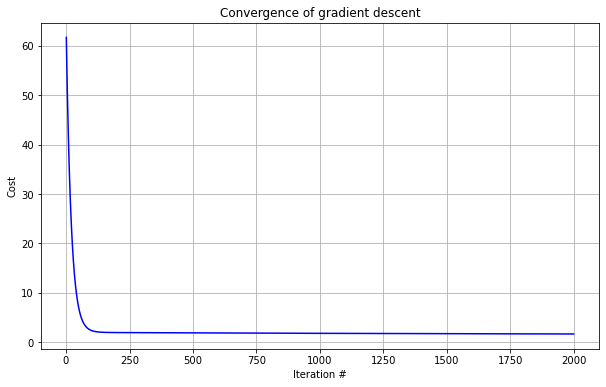

In [647]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Iteration #")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")



In [648]:
X_u0 = np.ones((n, 1))
X_test_m = np.hstack((X_test_m, X_u0))
print(X_test_m)

[[10.  9.  1.]
 [ 9.  9.  1.]
 [ 9.  8.  1.]
 [10. 11.  1.]
 [ 8.  8.  1.]
 [11.  9.  1.]
 [12. 12.  1.]
 [ 8.  9.  1.]
 [10.  9.  1.]
 [12. 10.  1.]
 [18. 18.  1.]
 [13. 12.  1.]
 [15. 14.  1.]
 [15. 13.  1.]
 [12. 11.  1.]
 [15. 15.  1.]
 [12. 12.  1.]
 [18. 18.  1.]
 [14. 13.  1.]
 [14. 12.  1.]
 [10.  9.  1.]
 [10.  8.  1.]
 [14. 13.  1.]
 [16. 15.  1.]
 [12. 10.  1.]
 [11. 11.  1.]
 [15. 12.  1.]
 [17. 17.  1.]
 [15. 14.  1.]
 [14. 12.  1.]
 [17. 18.  1.]
 [ 8.  9.  1.]
 [15. 12.  1.]
 [12. 10.  1.]
 [ 9.  9.  1.]
 [14. 12.  1.]
 [13. 11.  1.]
 [13. 10.  1.]
 [15. 13.  1.]
 [13. 11.  1.]
 [ 8.  8.  1.]
 [ 9. 10.  1.]
 [11. 11.  1.]
 [11. 11.  1.]
 [13. 13.  1.]
 [11.  9.  1.]
 [11. 11.  1.]
 [12. 14.  1.]
 [16. 15.  1.]
 [ 9. 12.  1.]
 [14. 15.  1.]
 [11. 10.  1.]
 [10.  9.  1.]
 [14. 14.  1.]
 [ 9.  8.  1.]
 [12. 14.  1.]
 [ 7.  0.  1.]
 [ 8.  8.  1.]
 [10.  9.  1.]
 [16. 15.  1.]
 [14. 13.  1.]
 [ 7.  8.  1.]
 [16. 15.  1.]
 [ 9. 10.  1.]
 [11. 12.  1.]
 [10. 10.  1.]
 [16. 15. 

In [649]:
from math import sqrt
y_predicted_m = X_test_m.dot(theta_m)
rms_m = (mean_squared_error(y_predicted_m, y_test_m))
print(rms_m)


2.6051295674454784


In [650]:
from sklearn.metrics import r2_score   
r2_score(y_test_m, y_predicted_m)

0.679035301757763

In [651]:
                                #multi - variate using all features

In [652]:
X_m_all = merged_df.drop(['G3'], axis=1)
y_m_all = merged_df['G3']
print(X_m_all.shape)
print(y_m_all.shape)

(395, 18)
(395,)


In [653]:
main_df = main_df.sample(frac=1)

train_size = int(0.7 * len(main_df))
X_m = X_m_all
y_m = y_m_all
X_train_m = X_m[:train_size]
X_test_m = X_m[train_size:]

y_train_m = y[:train_size]
y_test_m = y[train_size:]



m = X_train_m.shape[0]
n = X_test_m.shape[0]
X_u0 = np.ones((m, 1))
X_u0[:5]
# X_train_m = X_train_m.reshape((m, 1))
# X_test_m = X_test_m.reshape((n, 1))
print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)

(276, 18)
(119, 18)
(276,)
(119,)


In [654]:
X_0 = np.ones((m, 1))
X_train_m = np.hstack((X_train_m, X_0))
print(X_train_m)
              
theta_m = [1] * X_train_m.shape[1]
print("theta: ", theta_m)
print("X: ", X_train_m.shape)

[[18.          4.          4.         ...  1.          1.94591015
   1.        ]
 [17.          1.          1.         ...  1.          1.60943791
   1.        ]
 [15.          1.          1.         ...  1.          2.39789527
   1.        ]
 ...
 [17.          1.          2.         ...  1.          1.09861229
   1.        ]
 [17.          2.          4.         ...  1.          1.09861229
   1.        ]
 [17.          2.          2.         ...  1.          1.94591015
   1.        ]]
theta:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
X:  (276, 19)


In [655]:
print(y_train_m.shape)
print(y_train_m.values)

(276,)
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12]


In [656]:
theta_m = np.zeros(X_train_m.shape[1])
cost = mse(X_train_m, y_train_m, theta_m)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 64.78985507246377


In [657]:
iterations = 2000;
alpha = 0.0001;
theta_m = np.zeros(X_train_m.shape[1])
theta_m, cost_history = gradient_descent(X_train_m, y_train_m, theta_m, alpha, iterations)
print('Final value of theta =')
print(theta_m)
print('cost_history =', cost_history)

Final value of theta =
[-7.41766112e-02  3.11259062e-02  6.70592170e-03 -2.15849579e-02
 -7.28434997e-02 -9.64533304e-03 -5.80265907e-02 -2.64611239e-02
  2.20368891e-02  3.63541869e-01  7.37546001e-01  0.00000000e+00
  1.00233346e-02  9.73322914e-03  6.96698803e-04 -3.97911364e-03
  1.50355868e-02  6.92605722e-02 -1.36861196e-03]
cost_history = [58.08726132651151, 52.145155383047786, 46.87703843526864, 42.206251266148826, 38.064854947438874, 34.39263886463942, 31.136241583998103, 28.2483717251951, 25.687117463579334, 23.41533457990905, 21.400104122432584, 19.612251762564068, 18.02592182620473, 16.618199781086926, 15.368777668030441, 14.25965759103031, 13.274888936797343, 12.400335486860529, 11.623469021805812, 10.933186404040661, 10.319647468286991, 9.774131352821186, 9.288909173735824, 8.857131183124215, 8.472726763570401, 8.130315798752038, 7.825130126067406, 7.552943924406958, 7.310012020652804, 7.093015214112131, 6.899011820559999, 6.725394728380647, 6.569853339778971, 6.430339841

Text(0.5, 1.0, 'Convergence of gradient descent (Multi-variate regression)')

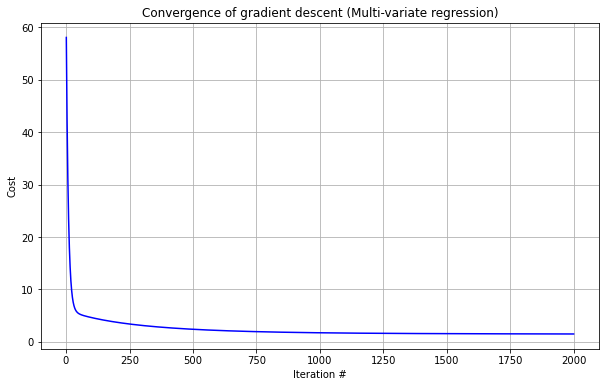

In [658]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Iteration #")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent (Multi-variate regression)")


In [659]:
X_u0 = np.ones((n, 1))
X_test_m = np.hstack((X_test_m, X_u0))
print(X_test_m)

[[18.          3.          2.         ...  0.          4.33073334
   1.        ]
 [18.          4.          4.         ...  1.          3.13549422
   1.        ]
 [18.          4.          4.         ...  1.          2.77258872
   1.        ]
 ...
 [21.          1.          1.         ...  1.          1.38629436
   1.        ]
 [18.          3.          2.         ...  1.          0.
   1.        ]
 [19.          1.          1.         ...  1.          1.79175947
   1.        ]]


In [660]:
from math import sqrt
y_predicted_m = X_test_m.dot(theta_m)
rms_m = (mean_squared_error(y_predicted_m, y_test_m))
print(rms_m)


2.410111268138231


In [661]:
from sklearn.metrics import r2_score   
r2_score(y_test_m, y_predicted_m)

0.7252910563551078

In [662]:
                                #Newtons method(univariate)

In [663]:
def newton_step(curr, y, X, reg=None):
    p = np.array(X.dot(curr[:,0]), ndmin=2).T  
    W = np.diag((p*(1-p))[:,0]) 
    hessian = X.T.dot(W).dot(X) 
    grad = X.T.dot(y-p)  
    if reg:
        step = np.dot(np.linalg.inv(hessian + reg*np.eye(curr.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)  
    beta = curr + step
    return beta

In [664]:
def check_convergence(beta_old, beta_new, tol, iters):
    coef_change = np.abs(beta_old - beta_new)
    return not (np.any(coef_change>tol) and iters < max_iters)
def test_model(X, y, beta):
    prob = np.array(X.dot(beta))
    prob = np.greater(prob, 0.5*np.ones((prob.shape[1],1)))
    accuracy = np.count_nonzero(np.equal(prob, y))/prob.shape[0] * 100
    return accuracy

In [665]:
test_split = int(merged_df.shape[0]*0.9) 
val_split = int(merged_df.shape[0]*0.8)

In [666]:
test_data = merged_df[test_split:]
val_data = merged_df[val_split:test_split]
data = merged_df[:val_split]

y_train_newton, X_train_newton = merged_df['G3'], merged_df.drop('G3', axis=1)
y_val, X_val = val_data['G3'], val_data.drop('G3', axis=1)
y_test_newton, X_test_newton = test_data['G3'], test_data.drop('G3', axis=1)

In [667]:
## Hyperparameters
max_iters = 20
tol=0.1 # convergence tolerance
reg_term = 1

beta_old, beta = np.ones((X_train_newton.shape[1],1)), np.zeros((X_train_newton.shape[1],1))
iter_count = 0
coefs_converged = False

for i in range(max_iters):
    print('Iteration: {}'.format(iter_count))
    print('Validation Accuracy: {}%'.format(
        test_model(X_val, y_val.to_frame(), beta_old)))
    beta_old = beta
    beta = newton_step(beta, y_train_newton.to_frame(), X_train_newton, reg_term)
    print(beta)

Iteration: 0
Validation Accuracy: 0.0%
[[68395.93684211]
 [11740.        ]
 [10673.        ]
 [ 8522.        ]
 [  891.        ]
 [13331.        ]
 [12523.        ]
 [14469.        ]
 [23981.        ]
 [49681.        ]
 [50221.        ]
 [  453.        ]
 [ 2041.        ]
 [ 3277.        ]
 [ 2108.        ]
 [ 3308.        ]
 [ 3978.        ]
 [ 5954.08337688]]
Iteration: 0
Validation Accuracy: 17.94871794871795%
[[68395.93684213]
 [11740.        ]
 [10673.        ]
 [ 8522.        ]
 [  891.        ]
 [13331.        ]
 [12523.        ]
 [14469.00000001]
 [23981.        ]
 [49680.99999999]
 [50221.        ]
 [  452.99999997]
 [ 2041.        ]
 [ 3277.00000001]
 [ 2108.        ]
 [ 3308.00000001]
 [ 3978.00000007]
 [ 5954.08337687]]
Iteration: 0
Validation Accuracy: 0.0%
[[68395.93684216]
 [11740.        ]
 [10673.        ]
 [ 8522.        ]
 [  891.        ]
 [13331.00000001]
 [12523.        ]
 [14469.00000001]
 [23981.        ]
 [49680.99999998]
 [50220.99999999]
 [  452.99999993]
 [ 

In [668]:
test_data = merged_df[test_split:]
val_data = merged_df[val_split:test_split]
data = merged_df[:val_split]

y_train_newton, X_train_newton = merged_df['G3'], merged_df.drop('G3', axis=1)
y_val, X_val = val_data['G3'], val_data.drop('G3', axis=1)
y_test_newton, X_test_newton = test_data['G3'], test_data.drop('G3', axis=1)

In [669]:
print(X_train_newton.shape)
X_u0 = np.ones((X_train_newton.shape[0]))
print(X_u0.shape)
X_u0 = X_u0.reshape((X_train_newton.shape[0], 1))
print(X_u0.shape)


(395, 18)
(395,)
(395, 1)


In [670]:
X_train_newton = np.hstack((X_train_newton, X_u0))

In [671]:
def compute_cost_n(X, y, theta):
    predictions = X.dot(theta)
    y = y.values.reshape(X.shape[0], 1)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

In [672]:
def hypothesis(X,theta):
    y_pred=X@theta
    return y_pred
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))
def gradient(X,theta,y):
    y_pred=hypothesis(X,theta)
    m=X.shape[0]
    y = y.values.reshape(m, 1)
    grad=np.dot(X.T,y_pred-y)
    return grad/m
def hessian(X,theta,y):
    y_pred=hypothesis(X,theta)
    m=X.shape[0]
    m=np.size(X,0)
    H=(X.T.dot(np.diag(y_pred.reshape(np.size(X,0),)))@(np.diag((1-y_pred).reshape(np.size(X,0),))).dot(X))
    return H/m
def Newtons(X,y,iters):
    m,n=X.shape
    theta=np.ones((n,1))
    err_list=[]
    for i in range(iters):
        err = compute_cost_n(X,y,theta)
        err_list.append(err)
        grad = gradient(X,theta,y)
        H=hessian(X,theta,y)
        theta=theta-(np.linalg.pinv(H)@grad)
    return theta,err_list

In [673]:
print(y_train_newton.shape)
theta,err = Newtons(X_train_newton, y_train_newton, 1000)

(395,)


In [674]:
print(theta[:5])

[[0.89259735]
 [0.87284351]
 [0.87825601]
 [0.85194286]
 [0.9658504 ]]


In [675]:
y_predicted_m = X_train_newton.dot(theta)
#rms_m = (mean_squared_error(y_predicted_m, y_test_m))

In [676]:
rms_m = (mean_squared_error(y_predicted_m, y_train_newton.values.reshape(y_train_newton.shape[0], 1)))

In [677]:
rms_m

69.81714180299639

                                       ##UNIVARIATE NEWTON

In [678]:
test_data = merged_df[test_split:]
val_data = merged_df[val_split:test_split]
data = merged_df[:val_split]

y_train_newton, X_train_newton = merged_df['G3'], merged_df['G2']
y_val, X_val = val_data['G3'], val_data.drop('G3', axis=1)
y_test_newton, X_test_newton = test_data['G3'], test_data['G2']

In [679]:
X_u0 = np.ones((X_train_newton.shape[0]))
X_u0 = X_u0.reshape((X_train_newton.shape[0], 1))
X_train_newton = X_train_newton.values.reshape((X_train_newton.shape[0], 1))



In [680]:
X_train_newton = np.hstack((X_train_newton, X_u0))

In [681]:
theta,err = Newtons(X_train_newton, y_train_newton, 100)

In [682]:
theta

array([[0.54340517],
       [8.04682127]])

In [683]:
y_predicted_m = X_train_newton.dot(theta)

In [684]:
rms_m = (mean_squared_error(y_predicted_m, y_train_newton.values.reshape(y_train_newton.shape[0], 1)))

In [685]:
rms_m

4.486314625992635